# Author: Ruslan Brilenkov 
## Contact: [LinkedIn](https://www.linkedin.com/in/ruslan-brilenkov/)

# A guide to Keras CNN without overfitting
## 

# Step 1: Importing the necessary libraries 

In [1]:
# of course, numerical Python:
import numpy as np
# utilities for the categorical data:
from tensorflow.keras.utils import to_categorical
# dataset:
from keras.datasets import cifar10

# building blocks of Keras:
from keras.layers.convolutional import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU

# Step 2: Loading our data set

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
NUMB_CLASSES = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, NUMB_CLASSES)
print(y_test[0])
y_test = to_categorical(y_test, NUMB_CLASSES)
print(y_test[0])

[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [3]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
np.argmax(y_train, axis = -1)

array([6, 9, 9, ..., 9, 1, 1])

## Visualizing a dataset

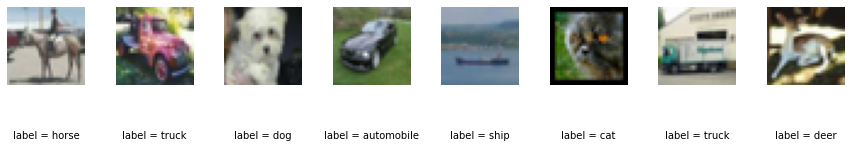

In [5]:
import matplotlib.pyplot as plt

# assigning a label to each class:
MY_CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
actual_label = MY_CLASSES[np.argmax(y_train, axis = -1)]

# chosign a number of images to show on one panel:
n_to_show = 8
indices = np.random.choice(range(len(x_train)), n_to_show)

# creating a figure
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_train[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.text(0.5, -0.7, f"label = {actual_label[idx]}", fontsize=10
                , ha='center', transform=ax.transAxes)
    ax.axis('off')
    ax.imshow(img)

# Step 3: Deciding on CNN architecture

In short, Keras CNN architecture is defined by 
- a number of CNN layers;
- a number of filters/kernels;
- a size of strides;
- padding.

Additionally, we will be using batch normalization, dropout layers, and activation function after every convolutional layer, which should greatly improve the perfromance of our network.

In [7]:
from keras.layers import Input, Flatten, Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Model

# Input layer
input_layer = Input((32,32,3))

# Creating CNN architecture
x = Conv2D(filters = 32, kernel_size = 3,
           strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3,
           strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3,
           strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3,
           strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUMB_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)


## We can summarize our model as follows

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 32)        0     

# Step 4: Compiling our model

## This step requires 3 things. One is optimizer type. Two is loss function. Three is performance evaluaiton metrics

In [9]:
from keras.optimizers import Adam
# define optimizer
opt = Adam(learning_rate=0.0005)
# compile the model with the optimizer, loss function and metrics for evaluation
model.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics=['accuracy'])

# Step 5: Training our model

## This step is pretty straightforward. Provide the training data X, and labels Y. Batch size, epochs for how long to train and whether to shuffle the data or not.

In [10]:
# training our model 
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True
         )

Epoch 1/10
1563/1563 [==============================] - 159s 89ms/step - loss: 1.7981 - accuracy: 0.3871
Epoch 2/10
1563/1563 [==============================] - 140s 89ms/step - loss: 1.1869 - accuracy: 0.5817
Epoch 3/10
1563/1563 [==============================] - 163s 105ms/step - loss: 1.0291 - accuracy: 0.6382
Epoch 4/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.9270 - accuracy: 0.6727
Epoch 5/10
1563/1563 [==============================] - 170s 109ms/step - loss: 0.8476 - accuracy: 0.7045
Epoch 6/10
1563/1563 [==============================] - 153s 98ms/step - loss: 0.7935 - accuracy: 0.7244
Epoch 7/10
1563/1563 [==============================] - 172s 110ms/step - loss: 0.7447 - accuracy: 0.7425
Epoch 8/10
1563/1563 [==============================] - 190s 121ms/step - loss: 0.7099 - accuracy: 0.7522
Epoch 9/10
1563/1563 [==============================] - 162s 104ms/step - loss: 0.6630 - accuracy: 0.7693
Epoch 10/10
1563/1563 [===========================

## As we see, our training process reduces loss and increases accuracy!

## But what about the model performance on the out-of-sample data, i.e., the data which our NN has never seen before?

# Step 6: Evaluating our model

In [11]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 7s 656ms/step - loss: 0.8223 - accuracy: 0.7184


[0.8223027586936951, 0.7184000015258789]

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.8223 - accuracy: 0.7184


[0.8223028182983398, 0.7184000015258789]

# Step 7: (Bonus) visualization of our model

In [13]:
MY_CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

pred = model.predict(x_test)
pred_single = MY_CLASSES[np.argmax(pred, axis = -1)]
actual_label = MY_CLASSES[np.argmax(y_test, axis = -1)]

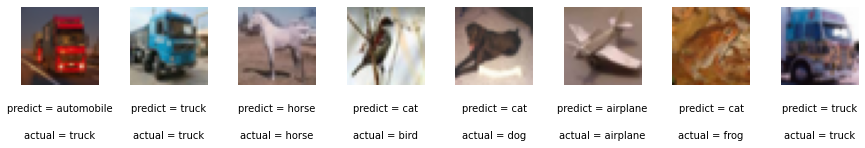

In [14]:
import matplotlib.pyplot as plt

n_to_show = 8
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.text(0.5, -0.35, f"predict = {pred_single[idx]}", fontsize=10
              , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, f"actual = {actual_label[idx]}", fontsize=10
                , ha='center', transform=ax.transAxes)
    ax.axis('off')
    ax.imshow(img)


---

# Conclusions

As we can see,this simple convolutional neural network (CNN) performs poorer than a simple classical neural network (NN), which I build in the previous part of this project. 

This is not a final judgement of our CNN because of the two reasons:
1. the network architecture is pretty basic, so it does not produce very elaborate training ground;
2. we can still greatly improve this CNN by adding a few additional layers, which are batch normalization and droupout layers.

Now, after implementing 2 methods against overfitting and additional activation function after every convolutional layer, the performance of our CNN has gretly improved.

### As an example, we went from 39% accuracy to almost 72% accuracy. Almost, twice. That is what I wanted to prove by creating this project. 

## Summary

In this 3-part project, I described in detail different Neural Network architectures in Keras, such as Sequential and Functional API architecture of the classic NN, simple convolutional NN (CNN), and finally, improved CNN. 

This project proved itself a success in proving some of the concepts, and I hope it also helped you to learn more about NN in Keras.